# Lab Case Study

## Scenario

You are working as an analyst for an auto insurance company. The company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

# Stage 1: DEFINE 

## Business Objectives = How much will this customer cost me?

* Retain customers,
* Analyze relevant customer data,
* Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

# Activity 1

# Stage 2: GATHER

### 1.1) Aggregate data into one Data Frame using Pandas.

In [1]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999

In [2]:
# In Terminal:
## Install xlrd package to load Excel files
## conda install openpyxl
## conda install xlrd

In [3]:
#load the data & print to check if it works
#all data are csv so its easy, if it would be text it would be('Data/file2.txt', sep = '\t')
file1= pd.read_csv("Data/file1.csv")
file2 = pd.read_csv("Data/file2.csv")
file3= pd.read_csv("Data/file3.csv")


In [4]:
file1

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Standarize before concatinating to avoid having to do lamda and .iloc later (more annoying)
file1.columns= [item.lower() for item in file1.columns]
file1

,customer,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
file2

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Total Claim Amount,Policy Type,Vehicle Class
0,GS98873,Arizona,F,Bachelor,323912.47%,16061,88,1/0/00,633.600000,Personal Auto,Four-Door Car
1,CW49887,California,F,Master,462680.11%,79487,114,1/0/00,547.200000,Special Auto,SUV
2,MY31220,California,F,College,899704.02%,54230,112,1/0/00,537.600000,Personal Auto,Two-Door Car
3,UH35128,Oregon,F,College,2580706.30%,71210,214,1/1/00,1027.200000,Personal Auto,Luxury Car
4,WH52799,Arizona,F,College,380812.21%,94903,94,1/0/00,451.200000,Corporate Auto,Two-Door Car
...,...,...,...,...,...,...,...,...,...,...,...
991,HV85198,Arizona,M,Master,847141.75%,63513,70,1/0/00,185.667213,Personal Auto,Four-Door Car
992,BS91566,Arizona,F,College,543121.91%,58161,68,1/0/00,140.747286,Corporate Auto,Four-Door Car
993,IL40123,Nevada,F,College,568964.41%,83640,70,1/0/00,471.050488,Corporate Auto,Two-Door Car
994,MY32149,California,F,Master,368672.38%,0,96,1/0/00,28.460568,Personal Auto,Two-Door Car


In [7]:
file2.columns= [item.lower() for item in file2.columns]
file2

,customer,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount,policy type,vehicle class
0,GS98873,Arizona,F,Bachelor,323912.47%,16061,88,1/0/00,633.600000,Personal Auto,Four-Door Car
1,CW49887,California,F,Master,462680.11%,79487,114,1/0/00,547.200000,Special Auto,SUV
2,MY31220,California,F,College,899704.02%,54230,112,1/0/00,537.600000,Personal Auto,Two-Door Car
3,UH35128,Oregon,F,College,2580706.30%,71210,214,1/1/00,1027.200000,Personal Auto,Luxury Car
4,WH52799,Arizona,F,College,380812.21%,94903,94,1/0/00,451.200000,Corporate Auto,Two-Door Car
...,...,...,...,...,...,...,...,...,...,...,...
991,HV85198,Arizona,M,Master,847141.75%,63513,70,1/0/00,185.667213,Personal Auto,Four-Door Car
992,BS91566,Arizona,F,College,543121.91%,58161,68,1/0/00,140.747286,Corporate Auto,Four-Door Car
993,IL40123,Nevada,F,College,568964.41%,83640,70,1/0/00,471.050488,Corporate Auto,Two-Door Car
994,MY32149,California,F,Master,368672.38%,0,96,1/0/00,28.460568,Personal Auto,Two-Door Car


In [8]:
file3

,Customer,State,Customer Lifetime Value,Education,Gender,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Total Claim Amount,Vehicle Class
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
2,ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car
3,KX23516,California,4455.843406,High School or Below,F,0,121,0,Personal Auto,699.615192,SUV
4,FN77294,California,7704.958480,High School or Below,M,30366,101,2,Personal Auto,484.800000,SUV
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,23405.987980,Bachelor,M,71941,73,0,Personal Auto,198.234764,Four-Door Car
7066,PK87824,California,3096.511217,College,F,21604,79,0,Corporate Auto,379.200000,Four-Door Car
7067,TD14365,California,8163.890428,Bachelor,M,0,85,3,Corporate Auto,790.784983,Four-Door Car
7068,UP19263,California,7524.442436,College,M,21941,96,0,Personal Auto,691.200000,Four-Door Car


In [9]:
#Fixing GENDER and Gender problem 
file3.columns= [item.lower() for item in file3.columns]
file3

,customer,state,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,total claim amount,vehicle class
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
2,ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car
3,KX23516,California,4455.843406,High School or Below,F,0,121,0,Personal Auto,699.615192,SUV
4,FN77294,California,7704.958480,High School or Below,M,30366,101,2,Personal Auto,484.800000,SUV
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,23405.987980,Bachelor,M,71941,73,0,Personal Auto,198.234764,Four-Door Car
7066,PK87824,California,3096.511217,College,F,21604,79,0,Corporate Auto,379.200000,Four-Door Car
7067,TD14365,California,8163.890428,Bachelor,M,0,85,3,Corporate Auto,790.784983,Four-Door Car
7068,UP19263,California,7524.442436,College,M,21941,96,0,Personal Auto,691.200000,Four-Door Car


In [10]:
file3.rename(columns = {'state':'st'}, inplace=True)
file3

,customer,st,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,total claim amount,vehicle class
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
2,ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car
3,KX23516,California,4455.843406,High School or Below,F,0,121,0,Personal Auto,699.615192,SUV
4,FN77294,California,7704.958480,High School or Below,M,30366,101,2,Personal Auto,484.800000,SUV
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,23405.987980,Bachelor,M,71941,73,0,Personal Auto,198.234764,Four-Door Car
7066,PK87824,California,3096.511217,College,F,21604,79,0,Corporate Auto,379.200000,Four-Door Car
7067,TD14365,California,8163.890428,Bachelor,M,0,85,3,Corporate Auto,790.784983,Four-Door Car
7068,UP19263,California,7524.442436,College,M,21941,96,0,Personal Auto,691.200000,Four-Door Car


In [11]:
# Merge into one Data Frame using Concat
# Reset Index - This comes handy when index is need to be used as a column. drop
# After standarizing the columns at the start, gender that was duplicated is removed 
pd.concat([file1,file2,file3], axis=0).reset_index(drop=True)

,customer,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
12069,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
12070,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
12071,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
12072,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [12]:
#Create a data frame with all the data merge 
CustomerAnalysis_df = pd.concat([file1,file2,file3], axis=0)
CustomerAnalysis_df

,customer,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


# Stage 3: CLEAN

### 1.2) Standardizing header names

In [13]:
#If there are no duplicated columns, standarizing goes in second place 
CustomerAnalysis_df.columns= [item.lower() for item in CustomerAnalysis_df.columns]
CustomerAnalysis_df

,customer,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


### 1.3) Deleting and rearranging columns – delete the column customer as it is only a unique identifier for each row of data

In [14]:
#Deleating colums: argument being the column wanting to be deleated 
#Column customer is only a unique identifier for each row of the data, hence not helping us understand more the customer
CustomerAnalysis_df.drop(columns=["customer"], inplace=True)
CustomerAnalysis_df

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [15]:
# Rearranging the columns
# Make a list 
list(CustomerAnalysis_df.columns)

['st',
 'gender',
 'education',
 'customer lifetime value',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'policy type',
 'vehicle class',
 'total claim amount']

In [16]:
CustomerAnalysis_df = CustomerAnalysis_df[['st',
 'gender',
 'education',
 'customer lifetime value',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'policy type',
 'vehicle class',
 'total claim amount']]

#To simply have the top 5 arguments (0-4 index) of the Data Frame use .head()
CustomerAnalysis_df.head()


,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [17]:
CustomerAnalysis_df

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [18]:
#To simply have the top 5 arguments (0-4 index) of the Data Frame use .head()
CustomerAnalysis_df.tail()

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
7065,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000
7069,California,M,College,2611.836866,0.0,77.0,0,Corporate Auto,Two-Door Car,369.600000


## Indexing & subsetting

### 1.4) Working with data types – Check the data types of all the columns and fix the incorrect ones (for ex. customer lifetime value and number of open complaints )

In [19]:
#Check Data Types
CustomerAnalysis_df.dtypes

st                            object
gender                        object
education                     object
customer lifetime value       object
income                       float64
monthly premium auto         float64
number of open complaints     object
policy type                   object
vehicle class                 object
total claim amount           float64
dtype: object

In [20]:
CustomerAnalysis_df._get_numeric_data()

,income,monthly premium auto,total claim amount
0,0.0,1000.0,2.704934
1,0.0,94.0,1131.464935
2,48767.0,108.0,566.472247
3,0.0,106.0,529.881344
4,36357.0,68.0,17.269323
...,...,...,...
7065,71941.0,73.0,198.234764
7066,21604.0,79.0,379.200000
7067,0.0,85.0,790.784983
7068,21941.0,96.0,691.200000


In [21]:
CustomerAnalysis_df["customer lifetime value"]

0               NaN
1        697953.59%
2       1288743.17%
3        764586.18%
4        536307.65%
           ...     
7065    23405.98798
7066    3096.511217
7067    8163.890428
7068    7524.442436
7069    2611.836866
Name: customer lifetime value, Length: 12074, dtype: object

In [22]:
# For every item in the column replace the sign by nothing
# IF the tyoe is a string, if not leave the number as it is 
cleaning = lambda x: x.replace('%', '') if type(x) == str else x

In [23]:
#Reassiign to the column 
CustomerAnalysis_df["customer lifetime value"] = CustomerAnalysis_df["customer lifetime value"].apply(cleaning)

In [24]:
pd.to_numeric(CustomerAnalysis_df["customer lifetime value"], errors="coerce")

0                NaN
1       6.979536e+05
2       1.288743e+06
3       7.645862e+05
4       5.363077e+05
            ...     
7065    2.340599e+04
7066    3.096511e+03
7067    8.163890e+03
7068    7.524442e+03
7069    2.611837e+03
Name: customer lifetime value, Length: 12074, dtype: float64

In [25]:
# For every number with a /, creating a list, taking the middle number 
# only if its a string, if not leaving the number 
cleaning = lambda x: x.split('/')[1] if type(x) == str else x

In [26]:
CustomerAnalysis_df["customer lifetime value"]=pd.to_numeric(CustomerAnalysis_df["customer lifetime value"], errors="coerce")

In [27]:
CustomerAnalysis_df["number of open complaints"]=CustomerAnalysis_df["number of open complaints"].apply(cleaning)

In [28]:
CustomerAnalysis_df["number of open complaints"]

0       0
1       0
2       0
3       0
4       0
       ..
7065    0
7066    0
7067    3
7068    0
7069    0
Name: number of open complaints, Length: 12074, dtype: object

In [29]:
pd.to_numeric(CustomerAnalysis_df["number of open complaints"], errors="coerce")

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7065    0.0
7066    0.0
7067    3.0
7068    0.0
7069    0.0
Name: number of open complaints, Length: 12074, dtype: float64

In [30]:
CustomerAnalysis_df["number of open complaints"]=pd.to_numeric(CustomerAnalysis_df["number of open complaints"], errors="coerce")

In [31]:
#Check the corrected Data Types
CustomerAnalysis_df.dtypes
# Numeric data are efloats not objects, it has been corrected 

st                            object
gender                        object
education                     object
customer lifetime value      float64
income                       float64
monthly premium auto         float64
number of open complaints    float64
policy type                   object
vehicle class                 object
total claim amount           float64
dtype: object

### 1.5) Filtering data and Correcting typos – Filter the data in state and gender column to standardize the texts in those columns

In [32]:
CustomerAnalysis_df

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,NaN,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,6.979536e+05,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1.288743e+06,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,7.645862e+05,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,5.363077e+05,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,2.340599e+04,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3.096511e+03,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8.163890e+03,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7.524442e+03,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


In [33]:
# Check value in an array
CustomerAnalysis_df.st.unique() 

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       'AZ', 'WA', nan], dtype=object)

In [34]:
# Check variable
CustomerAnalysis_df.st.value_counts() 
# Correct typos to standarize Data Frame by correcting texts
# AZ substituted by Arizona & WA by Washington 

California    3032
Oregon        2601
Arizona       1630
Nevada         882
Washington     768
Cali           120
AZ              74
WA              30
Name: st, dtype: int64

In [35]:
# Reassign with replace or inplace=True but inplace doesn't work for some reason 
CustomerAnalysis_df['st'] = CustomerAnalysis_df['st'].replace({'Cali': 'California', 'AZ': 'Arizona', 'WA': 'Washington'})
CustomerAnalysis_df['st']

0       Washington
1          Arizona
2           Nevada
3       California
4       Washington
           ...    
7065    California
7066    California
7067    California
7068    California
7069    California
Name: st, Length: 12074, dtype: object

In [36]:
#It works if there are no spaces & stuff, better use square brackets 
CustomerAnalysis_df.st.unique() 

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', nan],
      dtype=object)

In [37]:
#Best practice for searching for columns to avoid errors 
CustomerAnalysis_df["st"].unique() 

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', nan],
      dtype=object)

In [38]:
# Gender in caps and gender in small letters, pandas recognises it as something different 
# when we made them in a small letters they look the same though
# : ro2, 1 column 
# . iloc locate 
# value counts does not count missing values, dropna counts also the missing values so it appears as a result 
CustomerAnalysis_df.iloc[:, 1].value_counts(dropna=False)

F         4560
M         4368
NaN       3059
Male        40
female      30
Femal       17
Name: gender, dtype: int64

In [39]:
CustomerAnalysis_df.iloc[:, 2].value_counts(dropna=False)

NaN                     2937
Bachelor                2719
College                 2682
High School or Below    2616
Master                   752
Doctor                   344
Bachelors                 24
Name: education, dtype: int64

In [40]:
CustomerAnalysis_df.iloc[:, 1] = CustomerAnalysis_df['gender'].replace({'female': 'F', 'Femal': 'F', 'Male': 'M'})
CustomerAnalysis_df['gender']

0       NaN
1         F
2         F
3         M
4         M
       ... 
7065      M
7066      F
7067      M
7068      M
7069      M
Name: gender, Length: 12074, dtype: object

In [41]:
CustomerAnalysis_df.iloc[:, 1].unique() 

array([nan, 'F', 'M'], dtype=object)

In [42]:
#filling in the values to make sure gender columns merged 
CustomerAnalysis_df.iloc[:, 1] = CustomerAnalysis_df.iloc[:, 1].fillna(CustomerAnalysis_df.iloc[:, 2])
CustomerAnalysis_df

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,Master,Master,NaN,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,6.979536e+05,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1.288743e+06,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,7.645862e+05,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,5.363077e+05,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,2.340599e+04,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3.096511e+03,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8.163890e+03,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7.524442e+03,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


## 1.6) Removing duplicates

In [43]:
# Len function to count 
len(CustomerAnalysis_df)

12074

In [44]:
# same as numpy
CustomerAnalysis_df.shape

(12074, 10)

In [45]:
# drop duplicates across all columns
# Goes over all rows that have duplicates 
CustomerAnalysis_df.drop_duplicates(inplace=True)
CustomerAnalysis_df

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,Master,Master,NaN,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,6.979536e+05,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1.288743e+06,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,7.645862e+05,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,5.363077e+05,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,2.340599e+04,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3.096511e+03,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8.163890e+03,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7.524442e+03,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


In [46]:
# drop duplicates across a subset of columns
CustomerAnalysis_df.drop_duplicates(subset=["gender", "education", "policy type", "vehicle class"])

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,Master,Master,NaN,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,6.979536e+05,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1.288743e+06,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,7.645862e+05,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,5.363077e+05,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
2907,California,M,Bachelor,3.686091e+04,22854.0,122.0,0.0,Special Auto,Sports Car,878.400000
3581,Oregon,F,High School or Below,1.388333e+04,0.0,197.0,0.0,Corporate Auto,Luxury Car,1418.400000
4790,Oregon,M,Doctor,1.356143e+04,0.0,122.0,0.0,Special Auto,Sports Car,585.600000
4934,Oregon,F,Master,1.216864e+04,0.0,109.0,0.0,Special Auto,Sports Car,30.989755


In [47]:
# actually changes the dataset (and returns no output)
# Dropping columns with more null values
# Replacing / imputing null values
# Removing outliers
CustomerAnalysis_df.drop_duplicates
CustomerAnalysis_df

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,Master,Master,NaN,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,6.979536e+05,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1.288743e+06,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,7.645862e+05,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,5.363077e+05,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,2.340599e+04,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3.096511e+03,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8.163890e+03,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7.524442e+03,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


In [48]:
# hk_df.isna().sum()
# hk_df.isna().sum()/len(hk_df)
round(CustomerAnalysis_df.isna().sum()/len(CustomerAnalysis_df),4)*100  # shows the percentage of null values in a column

st                           0.01
gender                       0.01
education                    0.01
customer lifetime value      0.09
income                       0.01
monthly premium auto         0.01
number of open complaints    0.01
policy type                  0.01
vehicle class                0.01
total claim amount           0.01
dtype: float64

## 1.7) Replacing null values – Replace missing values with means of the column (for numerical columns)

Note: that the threshold values are usually higher percentages, for eg if 70% or more values in a column are missing, then its a good idea to drop those columns 

Numerical columns: Some ways to approach the problem

- Ignore these observations
-Replace with general average
-Replace with similar type of averages
-Build model to predict missing values

In [49]:
#It is shown as nan, technically a string should ‘null’ or ‘none’ and number as nan’. I think pandas present all of it as nan
nulls_df = pd.DataFrame(round(CustomerAnalysis_df.isna().sum()/len(CustomerAnalysis_df),4)*100)
# Reset Index as a column 
nulls_df = nulls_df.reset_index()
# Name the columns 
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,st,0.01
1,gender,0.01
2,education,0.01
3,customer lifetime value,0.09
4,income,0.01
5,monthly premium auto,0.01
6,number of open complaints,0.01
7,policy type,0.01
8,vehicle class,0.01
9,total claim amount,0.01


In [50]:
columns_drop = nulls_df[nulls_df['percent_nulls']>3]['header_name']  # dummy case with 3 
print(columns_drop.values)

[]


In [51]:
# Imputing the missing values, replacing them
#Filling a NAN with a value
### Median, Mean
### Using a ML Model 
#### Decide case by case and come up with the best strategy to fill them 

In [52]:
#get the empty rows in the gender column
CustomerAnalysis_df[CustomerAnalysis_df["customer lifetime value"].isna()== True] 
# checking rows that are null based on a specific column 

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,Master,Master,NaN,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
78,Washington,F,Master,NaN,41275.0,96.0,0.0,Personal Auto,Four-Door Car,41.122303
988,Washington,M,High School or Below,NaN,55561.0,63.0,0.0,Personal Auto,Four-Door Car,227.872071
1071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325,Washington,M,High School or Below,NaN,51878.0,66.0,1.0,Personal Auto,Four-Door Car,316.800000
372,Washington,High School or Below,High School or Below,NaN,36765.0,66.0,1.0,Personal Auto,Four-Door Car,320.849072
580,Washington,M,Master,NaN,0.0,70.0,0.0,Personal Auto,Four-Door Car,336.000000
861,Washington,F,Bachelors,NaN,25859.0,74.0,0.0,Special Auto,Four-Door Car,355.200000


In [53]:
# Since these nulls are not a lot, we can filter them 
CustomerAnalysis_df = CustomerAnalysis_df[CustomerAnalysis_df['customer lifetime value'].isna()==False] 

In [54]:
def remove_null_values(x):
    avg = np.mean(x)
    x = x.fillna(avg)
    return x

In [55]:
mean = (CustomerAnalysis_df['customer lifetime value'].mean())

In [56]:
CustomerAnalysis_df['customer lifetime value'] = CustomerAnalysis_df['customer lifetime value'].fillna(mean)
CustomerAnalysis_df['customer lifetime value']

<ipython-input-56-5fc735420b00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CustomerAnalysis_df['customer lifetime value'] = CustomerAnalysis_df['customer lifetime value'].fillna(mean)


1       6.979536e+05
2       1.288743e+06
3       7.645862e+05
4       5.363077e+05
5       8.256298e+05
            ...     
7065    2.340599e+04
7066    3.096511e+03
7067    8.163890e+03
7068    7.524442e+03
7069    2.611837e+03
Name: customer lifetime value, Length: 8868, dtype: float64

In [57]:
remove_null_values(CustomerAnalysis_df['customer lifetime value'])
#the function is working
#there are no null values 

1       6.979536e+05
2       1.288743e+06
3       7.645862e+05
4       5.363077e+05
5       8.256298e+05
            ...     
7065    2.340599e+04
7066    3.096511e+03
7067    8.163890e+03
7068    7.524442e+03
7069    2.611837e+03
Name: customer lifetime value, Length: 8868, dtype: float64

In [58]:
CustomerAnalysis_df

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
1,Arizona,F,Bachelor,6.979536e+05,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1.288743e+06,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,7.645862e+05,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,5.363077e+05,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
5,Oregon,F,Bachelor,8.256298e+05,62902.0,69.0,0.0,Personal Auto,Two-Door Car,159.383042
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,2.340599e+04,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3.096511e+03,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8.163890e+03,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7.524442e+03,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


# Activity 2

### 2.1) Bucketing the data / Creating groups of data 

2.1.1) Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central

In [59]:
CustomerAnalysis_df['st'].describe()

count           8868
unique             5
top       California
freq            3039
Name: st, dtype: object

<AxesSubplot:>

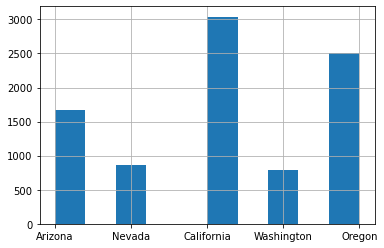

In [60]:
CustomerAnalysis_df.st.hist()

In [61]:
# First create a function for the region, else Central as there are 2 values 
# Name of the function, conditions
def region(x): 
    if x == "California":
        return "West Region"
    elif x == "Oregon":
        return "North West"
    elif x == "Washington":
        return "East"
    else: 
        return "Central"

In [62]:
#Map has 2 inputs, the function that is the region & st (the column where you want to apply the map)
CustomerAnalysis_df.insert(1, "region", list(map(region, CustomerAnalysis_df['st'])))

In [63]:
CustomerAnalysis_df

,st,region,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
1,Arizona,Central,F,Bachelor,6.979536e+05,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,Central,F,Bachelor,1.288743e+06,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,West Region,M,Bachelor,7.645862e+05,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,East,M,High School or Below,5.363077e+05,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
5,Oregon,North West,F,Bachelor,8.256298e+05,62902.0,69.0,0.0,Personal Auto,Two-Door Car,159.383042
...,...,...,...,...,...,...,...,...,...,...,...
7065,California,West Region,M,Bachelor,2.340599e+04,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
7066,California,West Region,F,College,3.096511e+03,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
7067,California,West Region,M,Bachelor,8.163890e+03,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
7068,California,West Region,M,College,7.524442e+03,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


### 2.2) Standardizing the data 

2.2.1) Use string functions to standardize the text data (lower case)

In [64]:
CustomerAnalysis_df = CustomerAnalysis_df.applymap(lambda s:s.lower() if type(s) == str else s)

In [65]:
CustomerAnalysis_df

,st,region,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
1,arizona,central,f,bachelor,6.979536e+05,0.0,94.0,0.0,personal auto,four-door car,1131.464935
2,nevada,central,f,bachelor,1.288743e+06,48767.0,108.0,0.0,personal auto,two-door car,566.472247
3,california,west region,m,bachelor,7.645862e+05,0.0,106.0,0.0,corporate auto,suv,529.881344
4,washington,east,m,high school or below,5.363077e+05,36357.0,68.0,0.0,personal auto,four-door car,17.269323
5,oregon,north west,f,bachelor,8.256298e+05,62902.0,69.0,0.0,personal auto,two-door car,159.383042
...,...,...,...,...,...,...,...,...,...,...,...
7065,california,west region,m,bachelor,2.340599e+04,71941.0,73.0,0.0,personal auto,four-door car,198.234764
7066,california,west region,f,college,3.096511e+03,21604.0,79.0,0.0,corporate auto,four-door car,379.200000
7067,california,west region,m,bachelor,8.163890e+03,0.0,85.0,3.0,corporate auto,four-door car,790.784983
7068,california,west region,m,college,7.524442e+03,21941.0,96.0,0.0,personal auto,four-door car,691.200000


# Activity 3

### Which columns are numerical?

In [66]:
# There is a function to identify numeric data directly 
num_cols = CustomerAnalysis_df._get_numeric_data()
num_cols

,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount
1,6.979536e+05,0.0,94.0,0.0,1131.464935
2,1.288743e+06,48767.0,108.0,0.0,566.472247
3,7.645862e+05,0.0,106.0,0.0,529.881344
4,5.363077e+05,36357.0,68.0,0.0,17.269323
5,8.256298e+05,62902.0,69.0,0.0,159.383042
...,...,...,...,...,...
7065,2.340599e+04,71941.0,73.0,0.0,198.234764
7066,3.096511e+03,21604.0,79.0,0.0,379.200000
7067,8.163890e+03,0.0,85.0,3.0,790.784983
7068,7.524442e+03,21941.0,96.0,0.0,691.200000


### Which columns are categorical?

In [67]:
# Not as easy as numeric but we have to search for the object 
cat_cols = CustomerAnalysis_df.select_dtypes(include=['object'])
cat_cols

,st,region,gender,education,policy type,vehicle class
1,arizona,central,f,bachelor,personal auto,four-door car
2,nevada,central,f,bachelor,personal auto,two-door car
3,california,west region,m,bachelor,corporate auto,suv
4,washington,east,m,high school or below,personal auto,four-door car
5,oregon,north west,f,bachelor,personal auto,two-door car
...,...,...,...,...,...,...
7065,california,west region,m,bachelor,personal auto,four-door car
7066,california,west region,f,college,corporate auto,four-door car
7067,california,west region,m,bachelor,corporate auto,four-door car
7068,california,west region,m,college,personal auto,four-door car


# Activity 4

# Stage 4: EXPLORE

### 4.1) Show a plot of the total number of responses.

Before getting started we import the necessary libraries we will use.
- Pandas
- Numpy
- Matplotlib Pyplot
- Seaborn

In [68]:
# import libraries to use (pandas, matplotlib.pyplot and seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
#load the new data & print to check if it works
#all data are csv so its easy, if it would be text it would be('Data/file2.txt', sep = '\t')
df= pd.read_csv("Data/Data_Marketing_Customer_Analysis_Round2.csv")
df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [70]:
df.columns= [item.lower() for item in df]
df

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [71]:
responses =df['response'].value_counts()
responses

No     8813
Yes    1466
Name: response, dtype: int64

<BarContainer object of 2 artists>

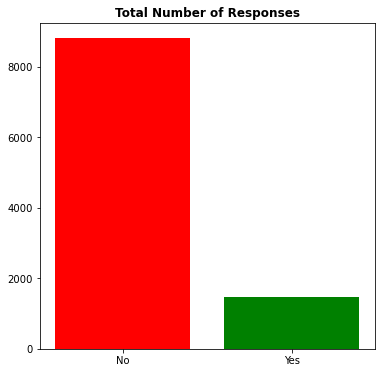

In [72]:
# create figure and axes
fig1, ax1 = plt.subplots(figsize = (6,6))

# set title
ax1.set_title('Total Number of Responses', fontweight='bold')

# plot the bar chart
ax1.bar(responses.index, responses, color=('red','green'))

In [ ]:
df.customer_lifetime_value.hist()

### 4.2) Show a plot of the response rate by the sales channel.

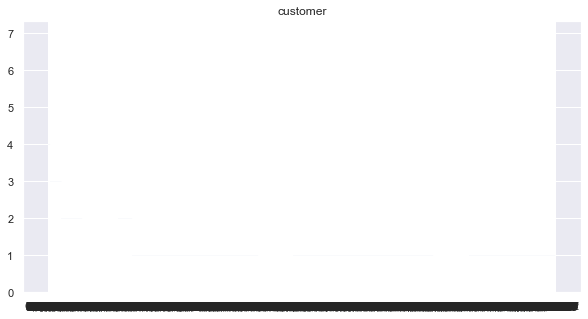

TypeError: 'value' must be an instance of str or bytes, not a float

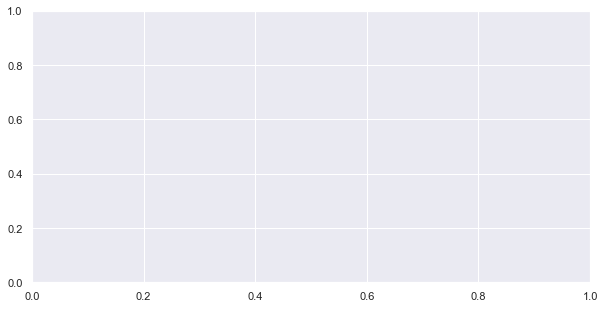

In [109]:
for c in df.select_dtypes(object):
    plt.figure(figsize=(10,5))
    plt.bar(df[c].unique(), df[c].value_counts())
    plt.title(c)
    plt.show();

In [ ]:
df.hist(by='response',
       column='sales channel')

In [74]:
response_rate = df['response'].value_counts()
response_rate

No     8813
Yes    1466
Name: response, dtype: int64

<AxesSubplot:xlabel='response', ylabel='count'>

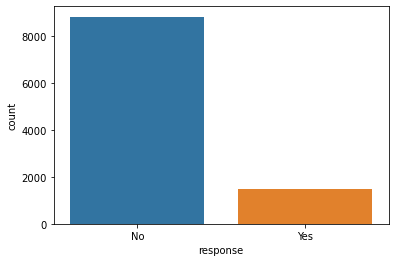

In [75]:
sns.countplot(data=df, x='response')

<AxesSubplot:xlabel='response', ylabel='count'>

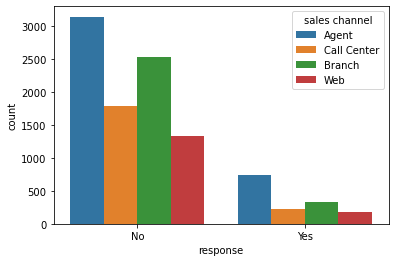

In [76]:
# hue = breaks it down in colours 
sns.countplot(data=df, x='response', hue='sales channel')

### 4.3) Show a plot of the response rate by the total claim amount.

<AxesSubplot:xlabel='response', ylabel='count'>

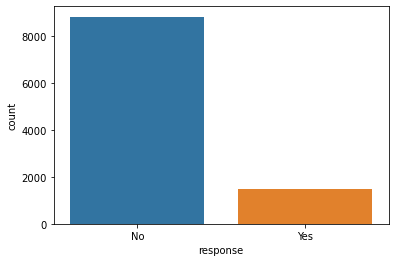

In [77]:
sns.countplot(data=df, x='response')

<AxesSubplot:xlabel='response', ylabel='total claim amount'>

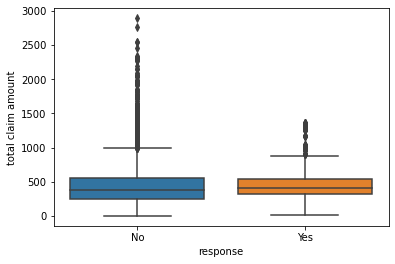

In [78]:
# A boxplot summarizes the distribution of a numeric variable for one or several groups. 
sns.boxplot( x=df["response"], y=df["total claim amount"] )

<AxesSubplot:xlabel='response', ylabel='total claim amount'>

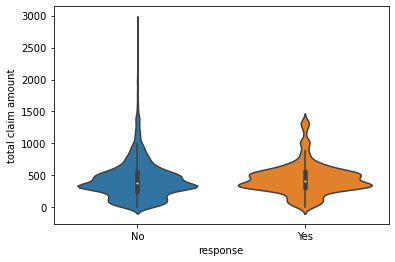

In [79]:
sns.violinplot(x=df["response"], y=df["total claim amount"])

### 4.4) Show a plot of the response rate by the income.

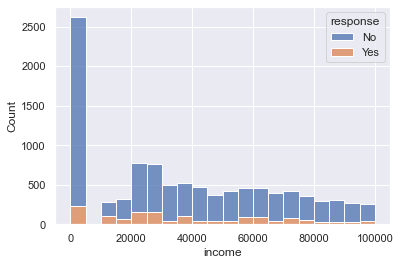

In [80]:
sns.set_theme(style="darkgrid")
ax2 = sns.histplot(hue='response', x='income', data=df, bins=20, multiple='stack')
# Stack the bars to make them more visible 

<AxesSubplot:xlabel='response', ylabel='income'>

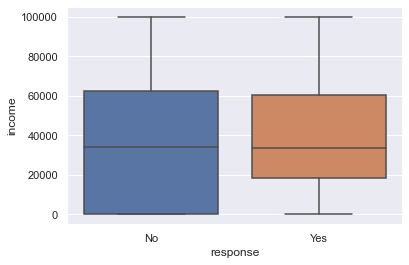

In [81]:
sns.boxplot( x=df["response"], y=df["income"] )

<AxesSubplot:xlabel='response', ylabel='income'>

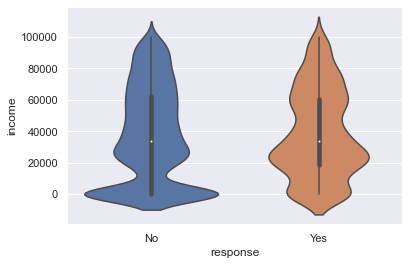

In [82]:
sns.violinplot(x=df["response"], y=df["income"])

### 4.5) Don't limit your creativity!  plot any interesting findings/insights that describe some interesting facts about your data set and its variables.

### 4.5.1) Total claim amount, by income, hue response rate 

<AxesSubplot:title={'center':'total claim amount by income'}, xlabel='total claim amount', ylabel='income'>

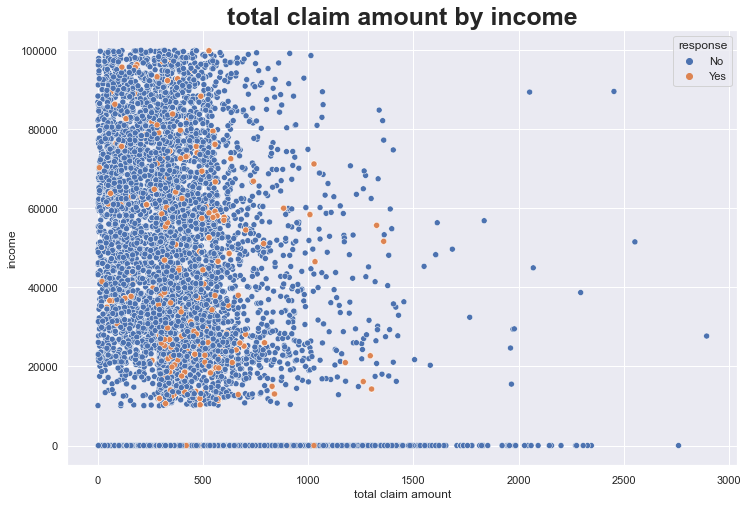

In [83]:
fig3, ax3 = plt.subplots(figsize = (12,8))
ax3.set_title('total claim amount by income', size='25', fontweight='bold')
sns.scatterplot(data=df, x='total claim amount', y='income', hue='response')
# If we wanted to build a prediction model, income and total claim amount not good predictors

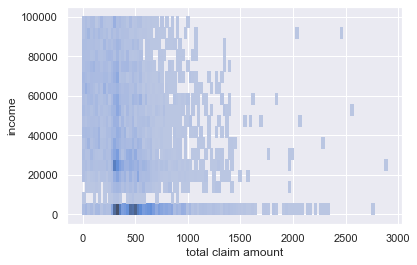

In [84]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
sns.histplot(data=df, x="total claim amount", y="income")
plt.show()

/Users/carlacolomer/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total claim amount'>

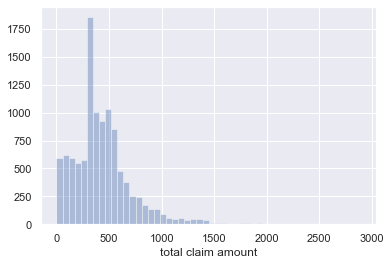

In [85]:
# Plot the histogram thanks to the distplot function
sns.distplot( a=df["total claim amount"], hist=True, kde=False, rug=False )

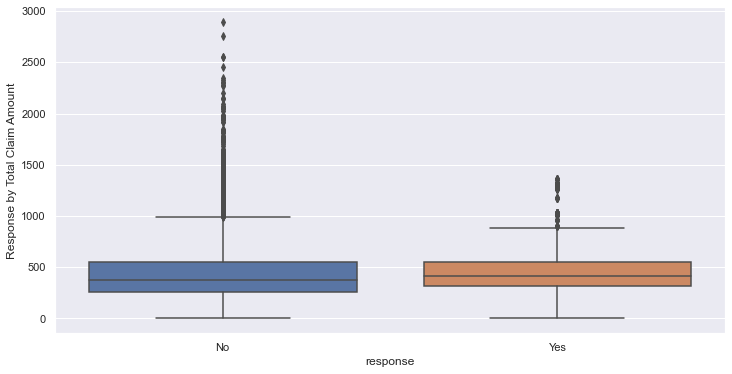

In [95]:
plt.figure(figsize=(12,6))
sns.boxplot(y="total claim amount" , x="response", data=df)
plt.ylabel('Response by Total Claim Amount')
plt.show()

# Data Transformation Lab 

### Check normality visually 

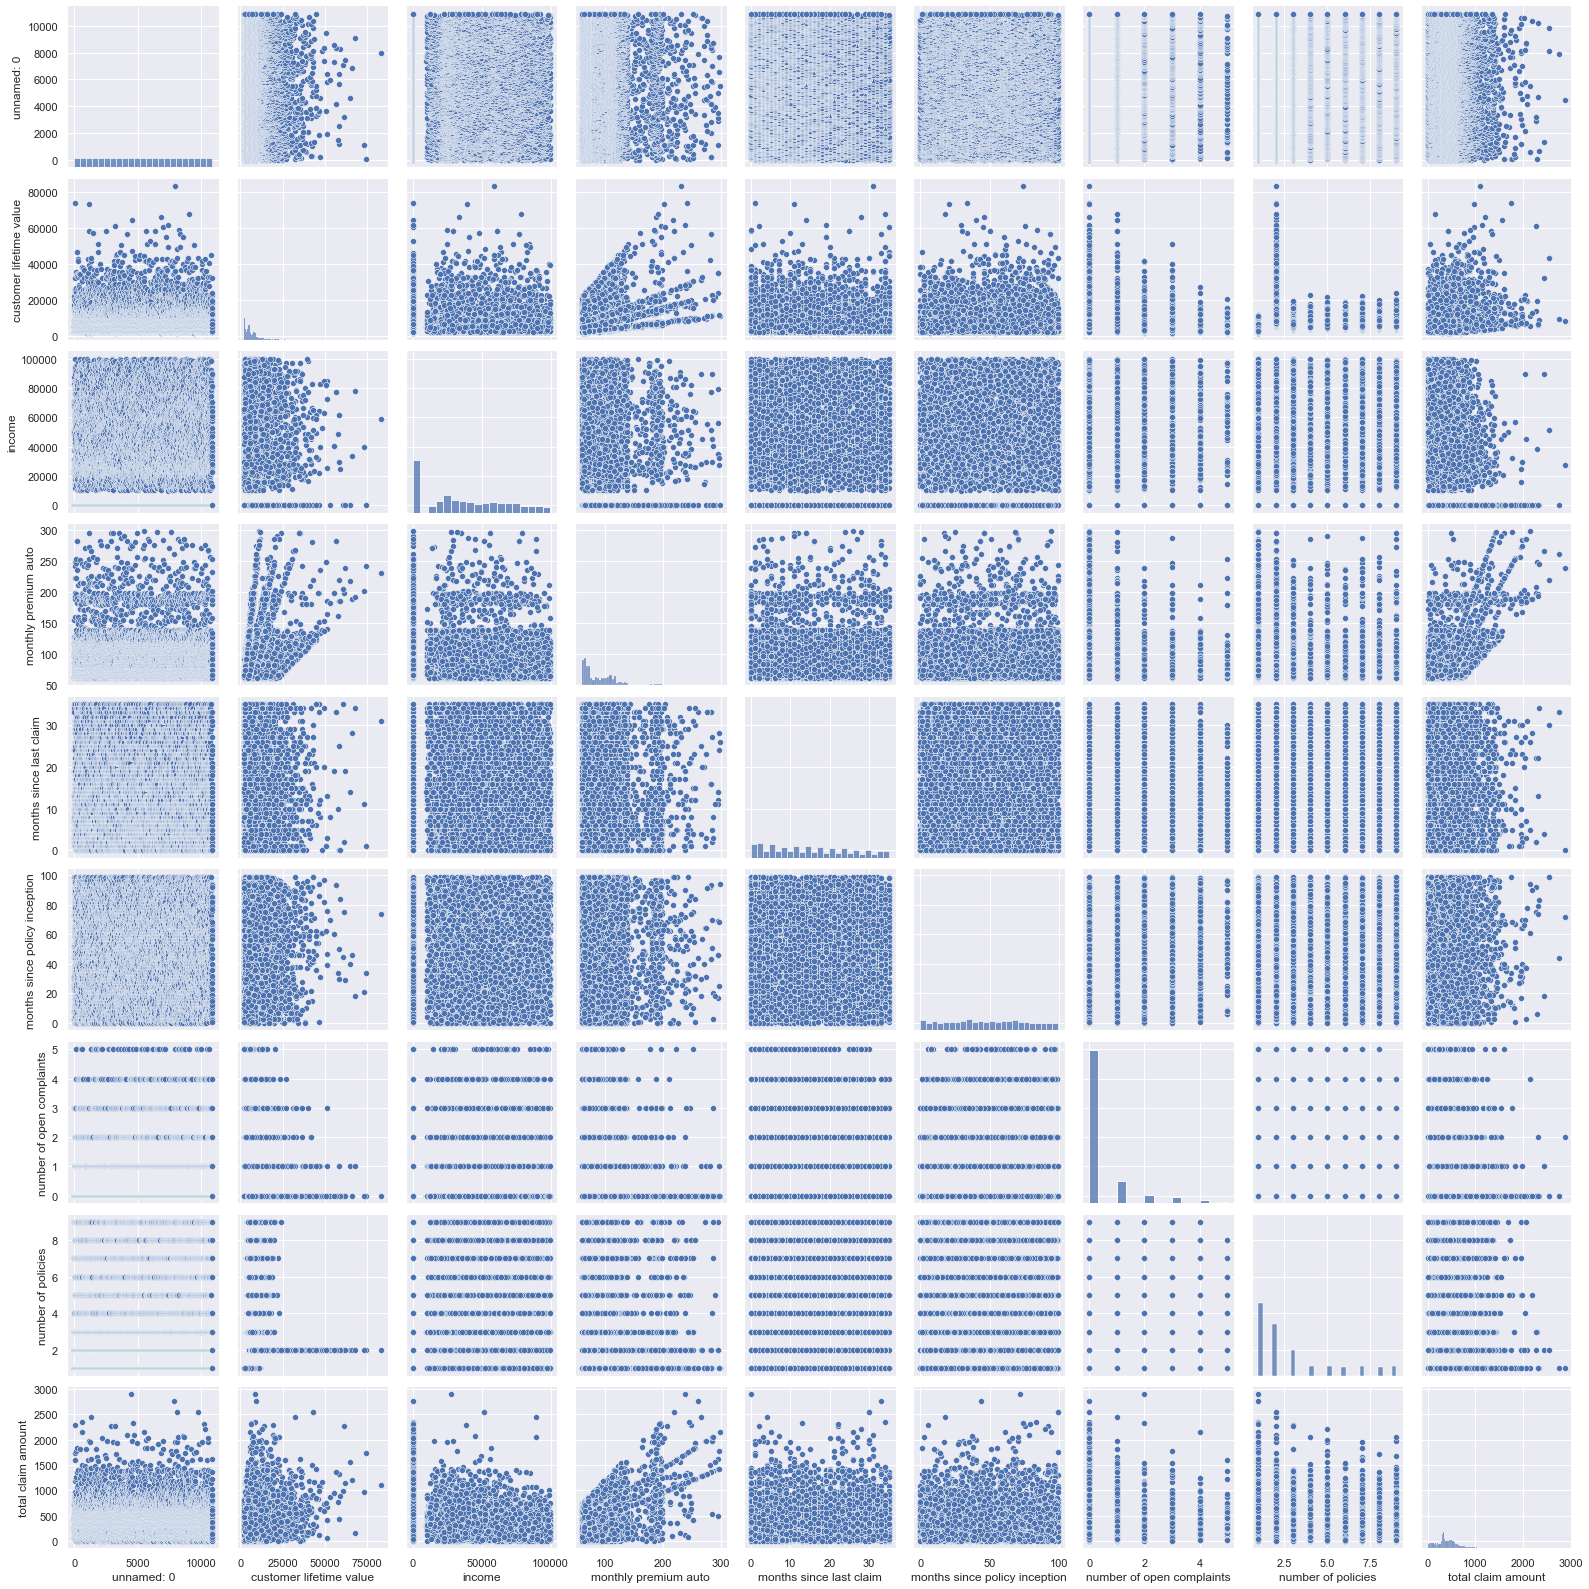

In [96]:
sns.pairplot(df)
plt.show()

/Users/carlacolomer/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='customer lifetime value', ylabel='Density'>

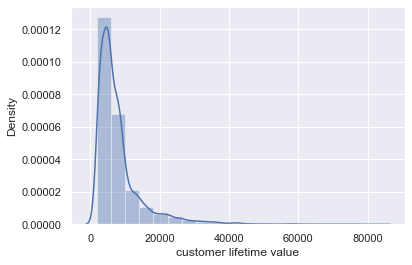

In [97]:
sns.distplot((df['customer lifetime value']), bins=20)

In [101]:
monthly=boxcox(df['customer lifetime value'],lmbda=-0.04)

<AxesSubplot:ylabel='Count'>

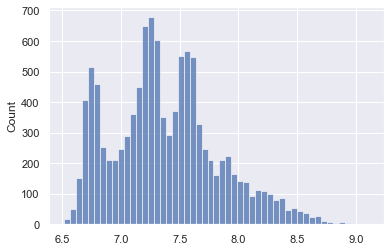

In [102]:
sns.histplot(monthly)

/Users/carlacolomer/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monthly premium auto', ylabel='Density'>

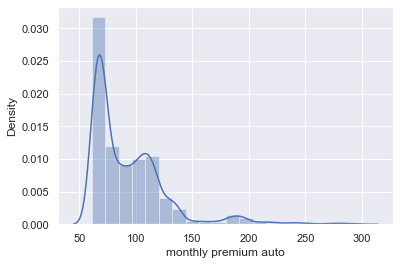

In [103]:
sns.distplot((df['monthly premium auto']), bins=20)

#### Checking Multicorrelinilaty

                               unnamed: 0  customer lifetime value    income  \
unnamed: 0                       1.000000                 0.001355  0.008910   
customer lifetime value          0.001355                 1.000000  0.028306   
income                           0.008910                 0.028306  1.000000   
monthly premium auto             0.000863                 0.403069 -0.009788   
months since last claim          0.007958                 0.016052 -0.023814   
months since policy inception    0.012795                 0.016960 -0.005903   
number of open complaints        0.007325                -0.032243  0.007163   
number of policies               0.002319                 0.016024 -0.009960   
total claim amount              -0.000593                 0.232626 -0.354141   

                               monthly premium auto  months since last claim  \
unnamed: 0                                 0.000863                 0.007958   
customer lifetime value                

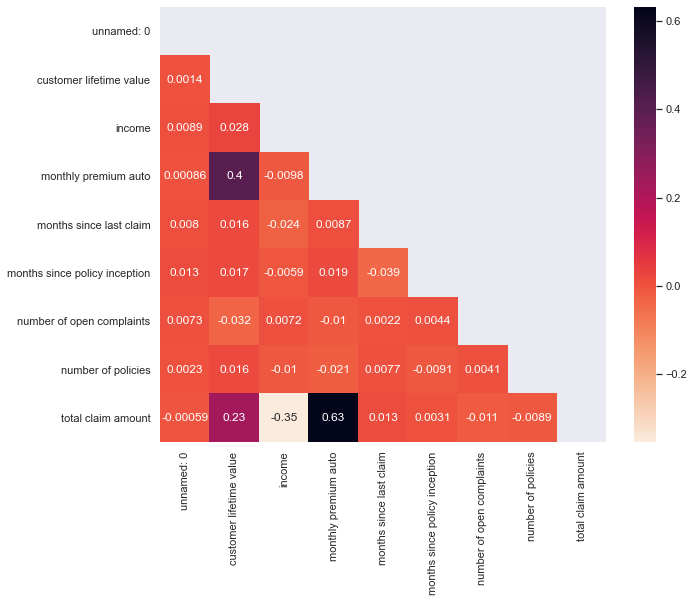

In [105]:
numericals_features=df._get_numeric_data()
correlations = numericals_features.corr()
print(correlations)
cmap = sns.cm.rocket_r  ## for reversing the colors
mask=np.zeros_like(numericals_features.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(numericals_features.corr(), mask=mask, annot=True,cmap=cmap)
plt.show()

### Ordinal and One-Hot Encodings for the Categorical Data

In [112]:
# retrieve the array of data
data = df.values
print (data)

[[0 'DK49336' 'Arizona' ... 'Four-Door Car' 'Medsize' nan]
 [1 'KX64629' 'California' ... 'Four-Door Car' 'Medsize' nan]
 [2 'LZ68649' 'Washington' ... 'SUV' 'Medsize' 'A']
 ...
 [10907 'TL39050' 'Arizona' ... 'Luxury SUV' 'Medsize' nan]
 [10908 'WA60547' 'California' ... 'SUV' 'Medsize' 'A']
 [10909 'IV32877' nan ... 'SUV' 'Medsize' nan]]


In [113]:
# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)

In [114]:
# summarize
print('Input', X.shape)
print('Output', y.shape)

Input (10910, 25)
Output (10910,)


### One Hot Encoding

In [116]:
# one hot encoding
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
# define data
data = asarray(df.values)
print(data)
# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# transform data
onehot = encoder.fit_transform(data)
print(onehot)

[[0 'DK49336' 'Arizona' ... 'Four-Door Car' 'Medsize' nan]
 [1 'KX64629' 'California' ... 'Four-Door Car' 'Medsize' nan]
 [2 'LZ68649' 'Washington' ... 'SUV' 'Medsize' 'A']
 ...
 [10907 'TL39050' 'Arizona' ... 'Luxury SUV' 'Medsize' nan]
 [10908 'WA60547' 'California' ... 'SUV' 'Medsize' 'A']
 [10909 'IV32877' nan ... 'SUV' 'Medsize' nan]]
[[1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


### OneHotEncoder Transform

In [120]:
# one hot encode input variables
onehot_encoder = OneHotEncoder(sparse=False)
X = onehot_encoder.fit_transform(X)

In [119]:
# one-hot encode the breast cancer dataset
# retrieve the array of data
data = df.values
# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)
# one hot encode input variables
onehot_encoder = OneHotEncoder(sparse=False)
X = onehot_encoder.fit_transform(X)
# ordinal encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# summarize the transformed data
print('Input', X.shape)
print(X[:5, :])

Input (10910, 39360)
[[1. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


### X,Y Split

In [125]:
# Splitting the Data-set into Independent and Dependent Features
# Splitting the Dataset into the Independent Feature Matrix:
X = df.iloc[:, :-1].values
print(X)

[[0 'DK49336' 'Arizona' ... 292.8 'Four-Door Car' 'Medsize']
 [1 'KX64629' 'California' ... 744.924331 'Four-Door Car' 'Medsize']
 [2 'LZ68649' 'Washington' ... 480.0 'SUV' 'Medsize']
 ...
 [10907 'TL39050' 'Arizona' ... 381.306996 'Luxury SUV' 'Medsize']
 [10908 'WA60547' 'California' ... 618.288849 'SUV' 'Medsize']
 [10909 'IV32877' nan ... 1021.719397 'SUV' 'Medsize']]


In [126]:
# Extracting the Dataset to Get the Dependent Vector
Y = df.iloc[:, -1].values
print(Y)

[nan nan 'A' ... nan 'A' nan]


In [133]:
import numpy as np
from sklearn.model_selection import train_test_split

X, Y = np.arange(10).reshape((5, 2)), range(5)

In [137]:
>>> import numpy as np
>>> from sklearn.model_selection import train_test_split
>>> X, y = np.arange(10).reshape((5, 2)), range(5)
>>> X
array([[0 'DK49336' 'Arizona' ... 292.8 'Four-Door Car' 'Medsize']
 [1 'KX64629' 'California' ... 744.924331 'Four-Door Car' 'Medsize']
 [2 'LZ68649' 'Washington' ... 480.0 'SUV' 'Medsize']
 ...
 [10907 'TL39050' 'Arizona' ... 381.306996 'Luxury SUV' 'Medsize']
 [10908 'WA60547' 'California' ... 618.288849 'SUV' 'Medsize']
 [10909 'IV32877' nan ... 1021.719397 'SUV' 'Medsize']])
>>> list(y)
[nan nan 'A' ... nan 'A' nan]

SyntaxError: invalid syntax (<ipython-input-137-6ad10fd072be>, line 5)